In [11]:
# Week 2: Day 1 - NumPy (Numerical Python)

#  Why use NumPy?
#Faster than normal Python lists
#Can handle large datasets like pressure, temp, or concentrations

import numpy as np

# Create array of temperatures
temps = np.array([300, 320, 350, 370, 400])
print("Kelvin temps:", temps)

# Convert to Celsius
celsius = temps - 273.15
print("In Celsius:", celsius)

# Simulate pressure using ideal gas law: P = nRT/V
n = 1.0
R = 0.0821
V = 10
pressures = (n * R * temps) / V
print("Pressures:", pressures)

# Array stats
print("Mean pressure:", np.mean(pressures))
print("Max temperature:", np.max(temps))

Kelvin temps: [300 320 350 370 400]
In Celsius: [ 26.85  46.85  76.85  96.85 126.85]
Pressures: [2.463  2.6272 2.8735 3.0377 3.284 ]
Mean pressure: 2.8570800000000003
Max temperature: 400


In [12]:
# Mini Project 3: Batch Reactor Energy Monitoring System
# Your Tasks:
# Store a list/array of 10 temperature readings (in Kelvin)
# Convert each temperature to Celsius
# Use a function to calculate the reaction rate k for each temperature
# Store all the k values in a NumPy array
# Print a summary:
# Mean rate
# Max rate and corresponding temperature
# Handle errors (e.g., negative temperatures or division by zero)

import numpy as np
import math as m 

def calculate_reaction_rate(T, A = 1e12, Ea = 75000):
    """Calculate rate constant using Arrhenius equation."""

    R = 8.134 # J/(mol*K)
    # Error handling for zero or negative values
    try:
        if T <= 0:
            raise ValueError("T must be greater than zero.")
        
        # Calculate k
        k = A * m.exp(-Ea / (R * T))
        return k 
    except ValueError as e:
        print(f"Error at T = {T}: K:", e)
        return None
    
# Store temperature in Kelvin and convert to Celsius
temps_K = np.array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390])
temps_C = temps_K - 273.15

# Calculate k store in array 
k_values = []

for T in temps_K:
    k = calculate_reaction_rate(T)
    if k is not None:
        k_values.append(k)
    else:
        k_values.append(0)

k_array = np.array(k_values)

# Print summary 
print("Temperature readings (K):", temps_K)
print("Temperature readings (C):", temps_C)

#k into 2 decimal places
formatted_k = [f"{k:.2e}" for k in k_array]
print("Reaction rate constants (k):", formatted_k, "s^-1")
# print("Reaction rate constants (k):", ", ".join(f"{k:.2e}" for k in k_array), "s^-1")

print(f"Mean reaction rate: {np.mean(k_array):.2e} s^-1")
print(f"Max reaction rate: {np.max(k_array):.2e} s^-1 at T = {temps_K[np.argmax(k_array)]} K")
print(f"Min k reaction rate: {np.max(k_array):.2e} s^-1")

Temperature readings (K): [300 310 320 330 340 350 360 370 380 390]
Temperature readings (C): [ 26.85  36.85  46.85  56.85  66.85  76.85  86.85  96.85 106.85 116.85]
Reaction rate constants (k): ['4.49e-02', '1.21e-01', '3.06e-01', '7.33e-01', '1.67e+00', '3.62e+00', '7.53e+00', '1.50e+01', '2.90e+01', '5.40e+01'] s^-1
Mean reaction rate: 1.12e+01 s^-1
Max reaction rate: 5.40e+01 s^-1 at T = 390 K
Min k reaction rate: 5.40e+01 s^-1


In [13]:
# Week 2: Day 2 - Pandas (Think Excel for Python)

# Pandas is a powerful library for data manipulation and analysis
# It provides data structures like Series and DataFrame for handling structured data
# Pandas is often used for data exploration, cleaning, and manipulation

import pandas as pd

# Create DataFrame manually
data = {
    "Compound": ["Ammonia", "Methanol", "Ethanol", "Water"],
    "Formula": ["NH3", "CH3OH", "C2H5OH", "H2O"],
    "Boiling Point (C)": [-33.34, 64.7, 78.37, 100],
    "Molar Mass (g/mol)": [17.03, 32.04, 46.07, 18.02],
}

df = pd.DataFrame(data)
print("Data frame of compounds:\n", df)

# Access a column 
print(df["Boiling Point (C)"])

# Describe summary stats for can only for numeric columns
print("Summary statistics for numeric columns:")
print(df.describe())

# Filter example: Show compounds with molar mass > 17 g/mol
molar_mass_filter = df[df["Molar Mass (g/mol)"] < 30]
print("Compounds with molar mass > 17 g/mol:\n", molar_mass_filter)

Data frame of compounds:
    Compound Formula  Boiling Point (C)  Molar Mass (g/mol)
0   Ammonia     NH3             -33.34               17.03
1  Methanol   CH3OH              64.70               32.04
2   Ethanol  C2H5OH              78.37               46.07
3     Water     H2O             100.00               18.02
0    -33.34
1     64.70
2     78.37
3    100.00
Name: Boiling Point (C), dtype: float64
Summary statistics for numeric columns:
       Boiling Point (C)  Molar Mass (g/mol)
count           4.000000            4.000000
mean           52.432500           28.290000
std            58.999532           13.692472
min           -33.340000           17.030000
25%            40.190000           17.772500
50%            71.535000           25.030000
75%            83.777500           35.547500
max           100.000000           46.070000
Compounds with molar mass > 17 g/mol:
   Compound Formula  Boiling Point (C)  Molar Mass (g/mol)
0  Ammonia     NH3             -33.34            

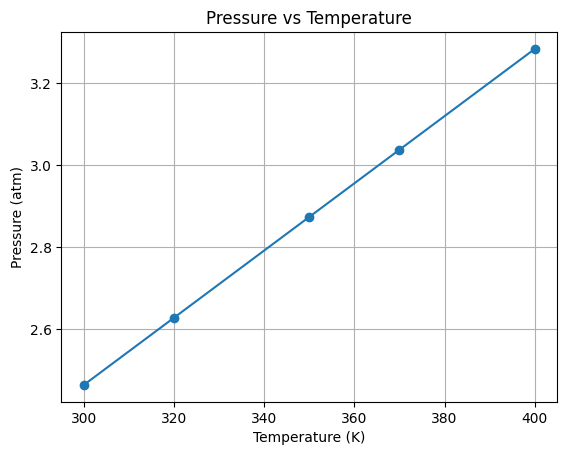

In [14]:
# Week 2: Day 3 - Matplotlib (Data Visualization)
# Matplotlib is a powerful library for creating static, animated, and interactive visualizations in Python

import matplotlib.pyplot as plt 
import numpy as np

temps = np.array([300, 320, 350, 370, 400])
pressures = (1 * 0.0821 * temps) / 10 # Ideal gas law P = nRT/V

plt.plot(temps, pressures, marker='o')
plt.title("Pressure vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (atm)")
plt.grid(True)
plt.show()

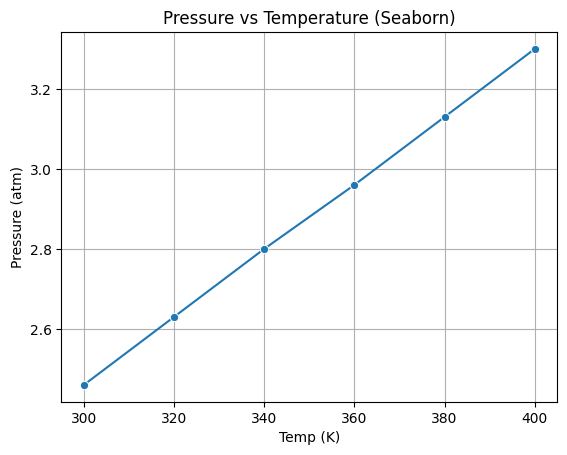

In [3]:
# Week 2: Day 4 - Seaborn (Advanced Visualization)
# Seaborn is built on top of Matplotlib and provides a high-level interface for drawing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    "Temp (K)": [300, 320, 340, 360, 380, 400],
    "Pressure (atm)": [2.46, 2.63, 2.80, 2.96, 3.13, 3.30]
}

df = pd.DataFrame(data)

# Line plot
sns.lineplot(data=df, x="Temp (K)", y="Pressure (atm)", marker='o')
plt.title("Pressure vs Temperature (Seaborn)")
plt.grid(True)
plt.show()

Temperatures in Celsius: [26.85 31.85 36.85 41.85 46.85 56.85 61.85 66.85 71.85 76.85 81.85 86.85]


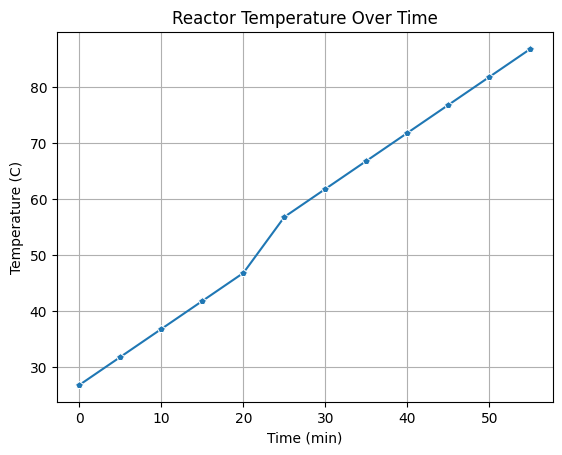

Average temperature: 57.27 C
Max temperature: 86.85 C
Min temperature: 26.85 C


In [16]:
# Mini project: Reactor Temperature Monitor 
# Steps:
# Create a list of temperatures taken every 5 minutes
# Convert to Celsius
# Calculate mean, min, and max
# Plot temp vs time using Matplotlib and Seaborn

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Simulated temperature data every 5 minutes for 1 hour
temps_K = np.array([300, 305, 310, 315, 320, 330, 335, 340, 345, 350, 355, 360])
time_min = np.arange(0, 60, 5) # Time in minutes

# Change to Celsius
temps_C = temps_K - 273.15
temps_C_array = np.array(temps_C)
print("Temperatures in Celsius:", temps_C_array)

# Create DataFrame
df = pd.DataFrame({
    "Time (min)": time_min,
    "Temperature (K)": temps_K,
    "Temperature (C)": temps_C_array
})

# Plot using Seaborn 
sns.lineplot(data=df, x= "Time (min)", y= "Temperature (C)", marker='p')
plt.title("Reactor Temperature Over Time")
plt.grid(True)
plt.show()

# Calculate mean, min and max
mean_temp = np.mean(temps_C)
max_temp = np.max(temps_C)
min_temp = np.min(temps_C)

print(f"Average temperature: {mean_temp:.2f} C")
print(f"Max temperature: {max_temp:.2f} C")
print(f"Min temperature: {min_temp:.2f} C")